<a href="https://colab.research.google.com/github/NicolasCaminos/Data_Science/blob/main/TP_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al Trabajo

La pandemia de COVID-19 ha afectado a millones de personas en todo el mundo y ha generado una gran cantidad de datos sobre la enfermedad y sus efectos en la salud de las personas. Este trabajo de Machine Learning se enfoca en analizar una base de datos sobre casos de COVID-19 obtenida de Kaggle.com, con el objetivo de determinar el riesgo de muerte de los pacientes.

La base de datos incluye información relevante sobre las variables de análisis, tales como el sexo, edad, clasificación según test de COVID-19, tipo de tratamiento recibido por el paciente, presencia o ausencia de neumonía, embarazo (en caso de ser paciente femenino), diabetes, asma, enfermedades que obstruyen las vías respiratorias de manera crónica, enfermedades inmuno supresoras, hipertensión, enfermedades cardiovasculares, enfermedades crónicas renales, otras enfermedades, obesidad, nivel de atención médica recibido, intubación, admisión en una unidad de cuidados intensivos y, en su caso, fecha de muerte.

El análisis de esta información permitirá entender mejor los factores que aumentan o disminuyen el riesgo de muerte en pacientes con COVID-19. Esta información puede ser de gran importancia para la toma de decisiones en el ámbito de la atención médica y para el desarrollo de estrategias de prevención y tratamiento efectivas. Además, el estudio de esta base de datos contribuirá a la investigación en torno a la COVID-19 y a la comprensión de la enfermedad.

Se utilizarán técnicas de Machine Learning para entrenar un modelo capaz de predecir el riesgo de muerte de los pacientes con base en las variables de análisis mencionadas. Se evaluarán diferentes algoritmos de aprendizaje automático y se seleccionará el que proporcione mejores resultados.

En conclusión, este trabajo de Machine Learning tiene el objetivo de analizar una base de datos sobre casos de COVID-19 y determinar el riesgo de muerte de los pacientes. Los resultados de este análisis pueden tener un impacto significativo en la atención médica y en la comprensión de la COVID-19. Esto contribuirá al avance del conocimiento en este ámbito y puede ser una herramienta valiosa para tomar decisiones informadas sobre el tratamiento de dicha enfermedad.

<base>&nbsp;&nbsp;La idea principal de este trabajo es averiguar si existe una relación entre los casos de muerte, la sintomatologia y fisiologia del paciente para luego poder usar estas variables recolectadas en un modelo que permita reconocer los pacientes de riesgo que cursan por dicha enfermedad.<br>
&nbsp;&nbsp;Para ello utilizaremos un Dataset que contiene el registro de casos de covid-19 con sus sintomas y en caso de que hayan muerto, sus fechas de muerte.<br>
&nbsp;&nbsp;Los sintomas seran utilizados como variables independientes y la variable dependiente sera una que indique si murio o no, que deribara de dicha fecha.</base>

# About the DataSet (fuente y datos copiados de la misma)

## Fuente:

COVID-19 Dataset (kaggle):
kaggle.com/datasets/meirnizri/covid19-dataset?resource=download

## Cotext

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

## Content:

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

1. sex: 1 for female and 2 for male.
2. age: of the patient.
3. classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
4. patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
5. pneumonia: whether the patient already have air sacs inflammation or not.
6. pregnancy: whether the patient is pregnant or not.
7. diabetes: whether the patient has diabetes or not.
8. copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
9. asthma: whether the patient has asthma or not.
10. inmsupr: whether the patient is immunosuppressed or not.
11. hypertension: whether the patient has hypertension or not.
12. cardiovascular: whether the patient has heart or blood vessels related disease.
13. renal chronic: whether the patient has chronic renal disease or not.
14. other disease: whether the patient has other disease or not.
15. obesity: whether the patient is obese or not.
16. tobacco: whether the patient is a tobacco user.
17. usmr: Indicates whether the patient treated medical units of the first, second or third level.
18. medical unit: type of institution of the National Health System that provided the care.
19. intubed: whether the patient was connected to the ventilator.
20. icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
21. date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

# Importación de Archivos y Librerías

El archivo que utilizaremos sera: </content/drive/MyDrive/PROGRAMACION/coderhouse/tps/Covid19/CovidData.csv>

In [ ]:
#importar librerias
from google.colab import drive
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Montar drive:
drive.mount ('/content/drive')
%cd "/content/drive/MyDrive/PROGRAMACION/coderhouse/tps/Covid19"
df = pd.read_csv ("CovidData.csv")

Mounted at /content/drive
/content/drive/MyDrive/PROGRAMACION/coderhouse/tps/Covid19


# Presentacion de Datos:

In [ ]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [ ]:
df.head(2)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97


## DATE_DIED --> MUERTE

Primero que nada vamos a visualizar y trabajar sobre nuestra variable principal que es la que usaremos como etiqueta.

DATE_DIED es una variable que contiene las fechas de muerte de las personas registradas en la base de datos con formato dd/mm/aaaa y en caso de no coresponder la fecha de muerte porque el pasiente no murio, el dato sera "9999-99-99".

In [ ]:
df["DATE_DIED"][:10:2]

0    03/05/2020
2    09/06/2020
4    21/06/2020
6    9999-99-99
8    9999-99-99
Name: DATE_DIED, dtype: object

In [ ]:
nm = len(df.loc[(df["DATE_DIED"] != "9999-99-99"), "DATE_DIED"])
ns = len(df.loc[(df["DATE_DIED"] == "9999-99-99"), "DATE_DIED"])
print("Numero de fechas de muertes: ",nm)
print("Numero de sobrevivientes: ",ns)
print("Total: ",nm+ns)

Numero de fechas de muertes:  76942
Numero de sobrevivientes:  971633
Total:  1048575


El dato de la fecha de muerte en si no nos interesa como tal, sino nos interesa saber si murio o no el pasiente por lo tanto vamos a reclasificar el dato simplificandolo a un simple dato booleano donde 1 significa muerto y o significa vivo.

In [ ]:
df.loc[(df["DATE_DIED"] == "9999-99-99"), "MUERTE"] = 0 # El valor indicara la supervivencia
df.loc[(df["DATE_DIED"] != "9999-99-99"), "MUERTE"] = 1 # El valor indicara la muerte
df = df.drop(["DATE_DIED"], axis="columns")
df.head(2)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,MUERTE
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1.0
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,1.0


## USMER

USMER es una variable que indica si el paciente fue tratado por unidades medicas de primer, segundo o tercer nivel.

In [ ]:
df["USMER"].value_counts()

2    662903
1    385672
Name: USMER, dtype: int64

Al parecer la variable no contiene registros de pasientes que sean atendidos en UM del tercer nivel, como tampoco contiene unidades nulas o no registradas.

Por conveniencia matemática, transformare el atributo en un booleano de 1 para los pacientes tratados en unidades medicas de primera categoria y 0 para los demás.

In [ ]:
df.loc[(df["USMER"] == 2), "USMER"] = 0
df["USMER"].value_counts()

0    662903
1    385672
Name: USMER, dtype: int64

##MEDICAL_UNIT --> MU4 , MU12


MEDICAL_UNIT es el tipo de institución del Sistema Nacional de Salud que brindó la atención.

In [ ]:
df['MEDICAL_UNIT'].value_counts()

12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64

Podemos notar que esta variable es clasificatoria pero esta expresada como variable numerica, lo que refleja una falsa idea de proporcionalidad. Vamos a transformarla en varias variables de clasificación booleana pero antes vamos a definir un criterio clasificatorio.

In [ ]:
round(df['MEDICAL_UNIT'].value_counts(normalize=True)*100,2)

12    57.51
4     29.98
6      3.87
9      3.64
3      1.83
8      0.99
10     0.75
5      0.69
11     0.53
13     0.09
7      0.08
2      0.02
1      0.01
Name: MEDICAL_UNIT, dtype: float64

Las Unidades medicas de tipo 12 y 4 son las mas populares por lo que separaremos esas de las demás en dos variables nuevas MU4 y MU12 con valores booleanos.

In [ ]:
df.loc[(df["MEDICAL_UNIT"] == 4), "MU4"] = 1
df.loc[(df["MEDICAL_UNIT"] != 4), "MU4"] = 0
df.loc[(df["MEDICAL_UNIT"] == 12), "MU12"] = 1
df.loc[(df["MEDICAL_UNIT"] != 12), "MU12"] = 0
df = df.drop(["MEDICAL_UNIT"], axis="columns")

##SEX

SEX es la variable que discrimina en 1 si es Femenino y 2 si es masculino.

In [ ]:
df['SEX'].value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

Se puede observar que la variable es bastante pareja y no contiene nulos ni faltantes.

Para esta variable aplicaremos el mismo criterio que en el caso anterior de trasformarlo en variable booleana para lo cual sera 1 para femenino y 0 para masculino (no femenino).

In [ ]:
df.loc[(df["SEX"] == 2), "SEX"] = 0

##PATIENT_TYPE --> HOSP

PATIENT_TYPE es la variable que indica tipo de atención que recibió el paciente en la unidad donde 1 indica regreso a casa y 2 hospitalización.

In [ ]:
df["PATIENT_TYPE"].value_counts()

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

Se observa que no hay nulos ni fallos de registro y se nota que las dos variables son del mismo orden (una es aproximadamente 4 veces la otra).

Transformaremos la variable PATIENT_TYPE en HOSP variable en una que indique hospitalizacion si o no. Donde 1 es si y 0 es no.

In [ ]:
df.rename(columns={'PATIENT_TYPE':'HOSP'},inplace=True)
df.columns

Index(['USMER', 'SEX', 'HOSP', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'MUERTE', 'MU4', 'MU12'],
      dtype='object')

In [ ]:
df.loc[(df["HOSP"] == 1), "HOSP"] = 0 # El 1 indicaba que fue enviado al domicilio
df.loc[(df["HOSP"] == 2), "HOSP"] = 1 # El 2 indicaba que fue hospitalizado

##INTUBED --> X (eliminada)

INTUBED indica si el paciente estaba conectado al ventilador.

In [ ]:
df["INTUBED"].value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [ ]:
round(df["INTUBED"].value_counts(normalize=True)*100,2)

97    80.92
2     15.17
1      3.21
99     0.70
Name: INTUBED, dtype: float64

Se puede notar que en esta variable el 81% esta conformado por datos faltantes por lo cual no resulta viable y debemos eliminarla.

In [ ]:
df.drop(["INTUBED"], axis="columns", inplace=True)

##PNEUMONIA

PNEUMONIA es una variable que indica si el paciente ya tiene inflamación de los alvéolos o no.

In [ ]:
df['PNEUMONIA'].value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [ ]:
round(df["PNEUMONIA"].value_counts(normalize=True)*100,2)

2     85.12
1     13.36
99     1.53
Name: PNEUMONIA, dtype: float64

En el caso de esta variable. Los registros faltantes comprenden un 1.53% por lo cual podemos eliminarlos Teniendo en cuenta que la cantidad de registros esta por encima del millon.

In [ ]:
df.drop(df.loc[(df["PNEUMONIA"] == 99)].index, axis=0, inplace=True)
df['PNEUMONIA'].value_counts()

2    892534
1    140038
Name: PNEUMONIA, dtype: int64

##AGE

AGE es la variable que registra la edad de los pacientes

In [ ]:
df.loc[(df["AGE"] > 120)]["AGE"].count()

1

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


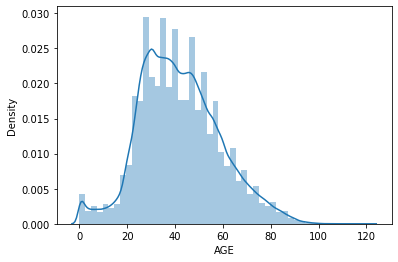

In [ ]:
sns.distplot(df['AGE']);

Por el momento se puede ver en primera instancia que los valores de distribucion no aparentan tener valores muy atipicos aunque posiblemente se deba restringir el intervalo de confianza aunque eso lo dejaremos para trabajo posterior. 

##PREGNANT --> X (Eliminada)

PREGNANT es la variable que indica la situacion de embarazo. Indicando con 1 si esta embarazada, 2 si no lo esta, 97 si es hombre y 98 si es mujer pero no se registra embarazo (informacion perdida).

In [ ]:

df.loc[(df["PREGNANT"] == 1), "PREGNANT"] = "EMBARAZADA"
df.loc[(df["PREGNANT"] == 2), "PREGNANT"] = "NO EMBARAZADA"
df.loc[(df["PREGNANT"] == 97), "PREGNANT"] = "HOMBRE"
df.loc[(df["PREGNANT"] == 98), "PREGNANT"] = "MUJER S/R"

Para comenzar analizaremos la variable de embarazo para ver su significancia en los casos y entender si la misma tiene o no importancia al momento de determinar los casos de muerte.

In [ ]:
freq = df.groupby(["PREGNANT"])["PREGNANT"].count()
freq

PREGNANT
EMBARAZADA         7870
HOMBRE           516154
MUJER S/R          3389
NO EMBARAZADA    505159
Name: PREGNANT, dtype: int64

In [ ]:
round(df["PREGNANT"].value_counts(normalize=True)*100,2)

HOMBRE           49.99
NO EMBARAZADA    48.92
EMBARAZADA        0.76
MUJER S/R         0.33
Name: PREGNANT, dtype: float64

<BarContainer object of 4 artists>

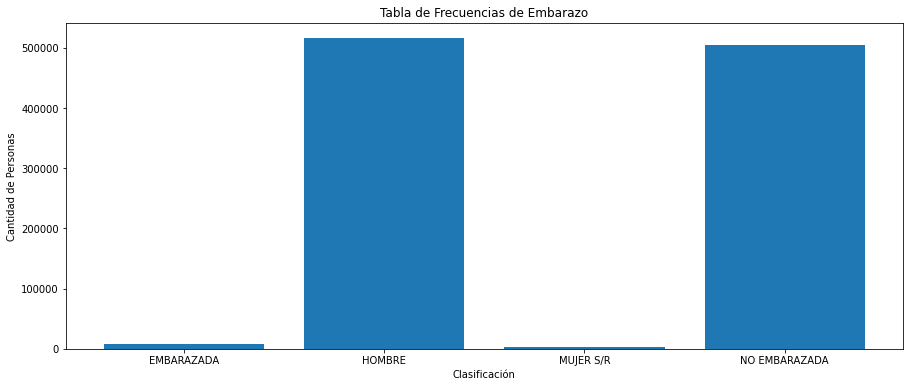

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Tabla de Frecuencias de Embarazo")
ax.set_xlabel("Clasificación")
ax.set_ylabel("Cantidad de Personas")
ax.bar (freq.index[:],freq.values)# X lista de columnas e Y las frecuencias acumuladas de X

<h3>Del gráfico podemos sacar las siguientes concluciones:</h3>
<base>&nbsp;&nbsp;La población de mujeres embarazadas es casi insignificante y a su vez comparable a la cantidad de mujeres que no pudieron ser catalogadas.<br>
&nbsp;&nbsp;Al no saber la naturaleza de porque no pudieron ser catalogadas no podemos suponer que probabilidad hay de que sean embarazadas o no por lo tanto podriamos esperar que sean todas "embarazadas" o que sean todas "no embarazadas".<br>
&nbsp;&nbsp;Es por esto que la variable no tiene cantidad de datos relevantes para que nos sea de utilidad y por ende la misma debe ser eliminada.
<base>

In [ ]:
df.drop(["PREGNANT"], axis="columns", inplace=True)

##DIABETES

DIABETES es la variable que indica cuando el paciente tien o no diabetes.

In [ ]:
df["DIABETES"].value_counts()

2     905856
1     123395
98      3321
Name: DIABETES, dtype: int64

In [ ]:
round(df["DIABETES"].value_counts(normalize=True)*100,2)

2     87.73
1     11.95
98     0.32
Name: DIABETES, dtype: float64

En un principio nos interesa cambiar el valor de los negativos por 0 en vez de 2 para obtener un valor booleano.
>Por otro lado podemos notar que los valores no registrados son una porcion insignificante y por ende pueden ser removidos.

In [ ]:
df.loc[(df["DIABETES"] == 2), "DIABETES"] = 0
df.drop (df.loc[(df["DIABETES"] == 98)].index, axis=0, inplace=True)
df["DIABETES"].value_counts()

0    905856
1    123395
Name: DIABETES, dtype: int64

##COPD

COPD es la variable que indica si el paciente tiene enfermedad pulmonar obstructiva crónica indicado con 1 o no indicado con 2.

In [ ]:
df.COPD.value_counts()

2     1014380
1       14507
98        364
Name: COPD, dtype: int64

In [ ]:
round(df.COPD.value_counts(normalize=True)*100,2)

2     98.56
1      1.41
98     0.04
Name: COPD, dtype: float64

> Nos interesa hacer de esta una variable booleana y eliminar los registros incompletos debido a que son pocos.

In [ ]:
df.loc[(df.COPD == 2), "COPD"] = 0
df.drop (df.loc[(df.COPD == 98)].index, axis=0, inplace=True)
df.COPD.value_counts()

0    1014380
1      14507
Name: COPD, dtype: int64

In [ ]:
df.columns

Index(['USMER', 'SEX', 'HOSP', 'PNEUMONIA', 'AGE', 'DIABETES', 'COPD',
       'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
       'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU',
       'MUERTE', 'MU4', 'MU12'],
      dtype='object')

##ASTHMA

ASTHMA Indica si el paciente tiene asma con 1 o no con 2.

In [ ]:
df.ASTHMA.value_counts()

2     998084
1      30623
98       180
Name: ASTHMA, dtype: int64

In [ ]:
round(df.ASTHMA.value_counts(normalize=True)*100,2)

2     97.01
1      2.98
98     0.02
Name: ASTHMA, dtype: float64

Hacemos los mismos cambios que con las variables anteriores.

In [ ]:
df.loc[(df.ASTHMA == 2), "ASTHMA"] = 0
df.drop (df.loc[(df.ASTHMA == 98)].index, axis=0, inplace=True)
df.ASTHMA.value_counts()

0    998084
1     30623
Name: ASTHMA, dtype: int64

##INMSUPR

In [ ]:
df.INMSUPR.value_counts()

2     1014482
1       13717
98        508
Name: INMSUPR, dtype: int64

In [ ]:
round(df.INMSUPR.value_counts(normalize=True)*100,2)

2     98.62
1      1.33
98     0.05
Name: INMSUPR, dtype: float64

Mismo menester que con variables anteriores.

In [ ]:
df.loc[(df.INMSUPR==2), "INMSUPR"] = 0
df.drop(df.loc[(df.INMSUPR==98)].index, axis=0, inplace=True)
df.INMSUPR.value_counts()

0    1014482
1      13717
Name: INMSUPR, dtype: int64

##HIPERTENSION

HIPERTENSION es la variable que contabiliza los pacientes con hipertención (1 para positivo y 2 para negativo)

In [ ]:
df.HIPERTENSION.value_counts()

2     867697
1     160278
98       224
Name: HIPERTENSION, dtype: int64

In [ ]:
round(df.HIPERTENSION.value_counts(normalize=True)*100,2)

2     84.39
1     15.59
98     0.02
Name: HIPERTENSION, dtype: float64

Aplicamos los cambios de las variables anteriores.

In [ ]:
df.loc[(df.HIPERTENSION == 2), "HIPERTENSION"] = 0
df.drop(df.loc[(df.HIPERTENSION == 98)].index, axis = 0, inplace = True)
df.HIPERTENSION.value_counts()

0    867697
1    160278
Name: HIPERTENSION, dtype: int64

##OTHER_DISEASE

OTHER_DISEASE es la variable que indica si el paciente tiene otras enfermedades donde 1 es para positivo y 2 para la negativa.

In [ ]:
df.OTHER_DISEASE.value_counts()

2     998991
1      27182
98      1802
Name: OTHER_DISEASE, dtype: int64

In [ ]:
round(df.OTHER_DISEASE.value_counts(normalize=True)*100,2)

2     97.18
1      2.64
98     0.18
Name: OTHER_DISEASE, dtype: float64

Se puede notar que la cantidad de registros faltantes es más significativa pero de igual manera son pocos en magnitud por lo que los eliminaremos.

In [ ]:
df.loc[(df.OTHER_DISEASE == 2), "OTHER_DISEASE"] = 0
df.drop(df.loc[(df.OTHER_DISEASE == 98)].index, axis = 0, inplace = True)
df.OTHER_DISEASE.value_counts()

0    998991
1     27182
Name: OTHER_DISEASE, dtype: int64

##CARDIOVASCULAR

CARDIOVASCULAR es una variable que indica los pacientes que tienen afecciones del distema circulatorio, ya sean del corazón o de los vasos sanguineos. Indicando 1 para positivo y 2 para negativo.

In [ ]:
df.CARDIOVASCULAR.value_counts()

2     1005884
1       20156
98        133
Name: CARDIOVASCULAR, dtype: int64

In [ ]:
round (df.CARDIOVASCULAR.value_counts(normalize = True)*100,2)

2     98.02
1      1.96
98     0.01
Name: CARDIOVASCULAR, dtype: float64

Aplicamos lo el mismo criterio que con variables anteriores.

In [ ]:
df.loc[(df.CARDIOVASCULAR == 2), "CARDIOVASCULAR"] = 0
df.drop(df.loc[(df.CARDIOVASCULAR == 98)].index, axis = 0 , inplace = True)
df.CARDIOVASCULAR.value_counts()

0    1005884
1      20156
Name: CARDIOVASCULAR, dtype: int64

##OBESITY

In [ ]:
df.OBESITY.value_counts()

2     868516
1     157142
98       382
Name: OBESITY, dtype: int64

In [ ]:
round (df.OBESITY.value_counts(normalize = True)*100,2)

2     84.65
1     15.32
98     0.04
Name: OBESITY, dtype: float64

In [ ]:
df.loc[(df.OBESITY == 2), "OBESITY"] = 0
df.drop(df.loc[(df.OBESITY == 98)].index, axis = 0 , inplace = True)
df.OBESITY.value_counts()

0    868516
1    157142
Name: OBESITY, dtype: int64

##RENAL_CHRONIC

In [ ]:
df.RENAL_CHRONIC.value_counts()

2     1007142
1       18375
98        141
Name: RENAL_CHRONIC, dtype: int64

In [ ]:
round (df.RENAL_CHRONIC.value_counts(normalize = True)*100,2)

2     98.19
1      1.79
98     0.01
Name: RENAL_CHRONIC, dtype: float64

In [ ]:
df.loc[(df.RENAL_CHRONIC == 2), "RENAL_CHRONIC"] = 0
df.drop(df.loc[(df.RENAL_CHRONIC == 98)].index, axis = 0 , inplace = True)
df.RENAL_CHRONIC.value_counts()

0    1007142
1      18375
Name: RENAL_CHRONIC, dtype: int64

##TOBACCO

In [ ]:
df.TOBACCO.value_counts()

2     942477
1      82675
98       365
Name: TOBACCO, dtype: int64

In [ ]:
round (df.TOBACCO.value_counts(normalize = True)*100,2)

2     91.90
1      8.06
98     0.04
Name: TOBACCO, dtype: float64

In [ ]:
df.loc[(df.TOBACCO == 2), "TOBACCO"] = 0
df.drop(df.loc[(df.TOBACCO == 98)].index, axis = 0 , inplace = True)
df.TOBACCO.value_counts()

0    942477
1     82675
Name: TOBACCO, dtype: int64

##CLASIFFICATION_FINAL

CLASIFFICATION_FINAL son los resultados de la prueba de covid. Los valores 1-3 significan que el paciente fue diagnosticado con covid en diferentes grados. 4 o superior significa que el paciente no es portador de covid o que la prueba no es concluyente

Como el objetivo de nuestro trabajo es determinar cuantos de los pacientes con covid-19 van a morir, debemos eliminar los que no son pacientes de covid-19 y agrupar el resto.

In [ ]:
df.CLASIFFICATION_FINAL.value_counts()

7    490123
3    378629
6    117756
5     25305
1      8448
4      3090
2      1801
Name: CLASIFFICATION_FINAL, dtype: int64

In [ ]:
df.drop(df.loc[(df.CLASIFFICATION_FINAL > 3)].index , axis = 0 , inplace = True)
df.drop(["CLASIFFICATION_FINAL"], axis="columns", inplace = True)
df.MUERTE.value_counts()

0.0    335518
1.0     53360
Name: MUERTE, dtype: int64

##ICU

ICU Indica si el paciente había sido ingresado en una Unidad de Cuidados Intensivos.

Como el objetivo del trabajo es determinar cuales pacientes tienen riesgo de vida no nos detendremos a ver la clasificacion que los medicos hicieron sobre dicho riesgo sino sobre el riesgo real de dichos pacientes. Por lo tanto eliminaremos este dato.

In [ ]:
df.drop(["ICU"], axis="columns", inplace = True)

## HEATMAP

<AxesSubplot:>

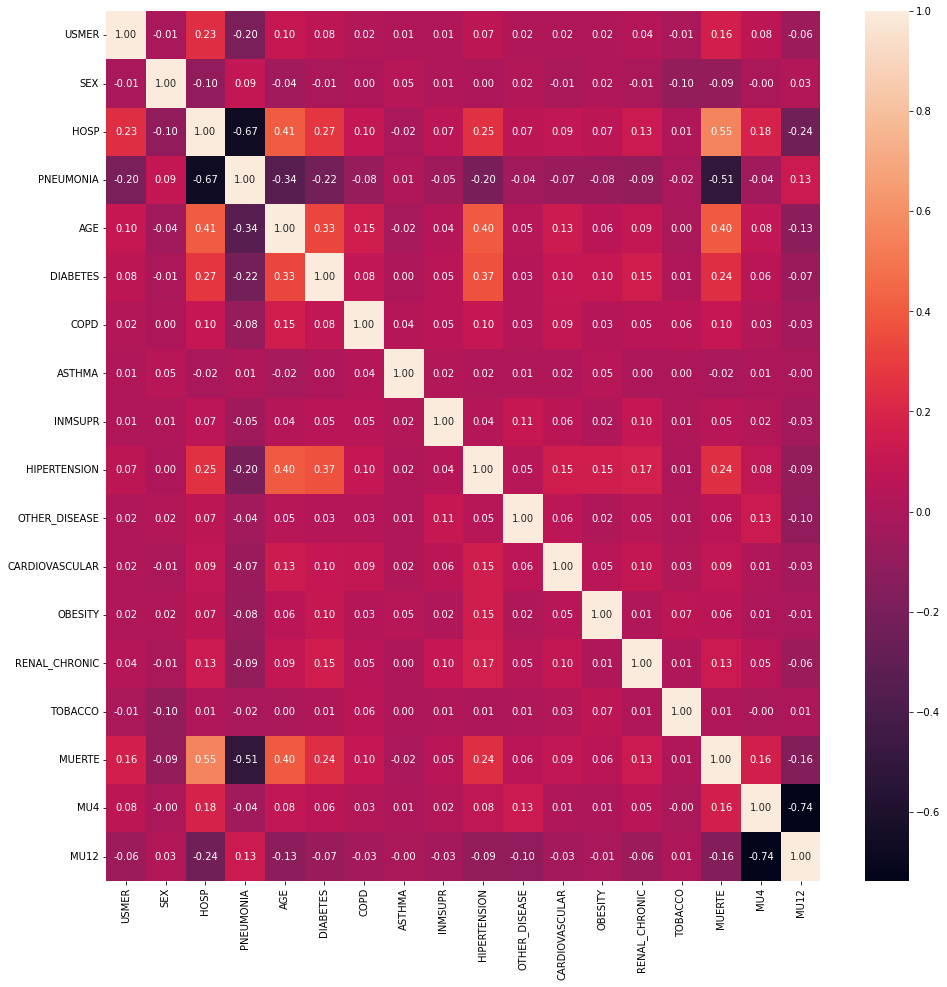

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(data=df.corr(),annot=True, fmt=".2f")

#Arbol de Desiciones

In [ ]:
#Algortimo Ml seleccionados 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#Metricas 

from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
Car = df.drop('MUERTE',axis = 1)
obj = df.MUERTE

X = Car
y = obj

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify= y)

In [ ]:
Dec_model=DecisionTreeClassifier( )
Dec_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
print(Dec_model.predict(X.head()))
print(df.MUERTE.head())

[0. 0. 0. 0. 0.]
0    1.0
2    1.0
4    1.0
5    0.0
6    0.0
Name: MUERTE, dtype: float64


Al parecer el modelo tiene una tendencia a decir que los muertos estan vivos, devido a que los muertos son una parte menor de la población. Es un modelo sesgado.

In [ ]:
round(df.MUERTE.value_counts(normalize = True)*100, 2)

0.0    86.28
1.0    13.72
Name: MUERTE, dtype: float64

In [ ]:
Dec_model.score(X_test,y_test)

0.8798986833984777